<a href="https://colab.research.google.com/github/Dh0t/Tugas/blob/main/BigDataPTM11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Muat dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/laptop_price.csv'

# Membaca file CSV
try:
    data = pd.read_csv(file_path, encoding='latin-1')
except UnicodeDecodeError:
    # Jika latin-1 gagal, coba pengkodean umum lainnya seperti 'cp1252'
    data = pd.read_csv(file_path, encoding='cp1252')


# Tampilkan beberapa baris pertama dataset
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [2]:
# Periksa nilai yang hilang dalam dataset
missing_values = data.isnull().sum()

# Periksa tipe data dan statistik dasar untuk setiap kolom
data_info = data.dtypes

# Pembersihan dasar (misalnya, hapus spasi yang tidak perlu, periksa duplikat)
data_cleaned = data.drop_duplicates()

# Tampilkan nilai yang hilang dan informasi data
missing_values, data_info

(laptop_ID           0
 Company             0
 Product             0
 TypeName            0
 Inches              0
 ScreenResolution    0
 Cpu                 0
 Ram                 0
 Memory              0
 Gpu                 0
 OpSys               0
 Weight              0
 Price_euros         0
 dtype: int64,
 laptop_ID             int64
 Company              object
 Product              object
 TypeName             object
 Inches              float64
 ScreenResolution     object
 Cpu                  object
 Ram                  object
 Memory               object
 Gpu                  object
 OpSys                object
 Weight               object
 Price_euros         float64
 dtype: object)

In [3]:
# Bersihkan kolom 'Weight' untuk mengekstrak nilai numerik (kg)
data_cleaned['Weight'] = data_cleaned['Weight'].str.replace('kg', '').astype(float)

# Ekstrak nilai numerik dari 'Ram' (misalnya, '8GB' -> 8)
data_cleaned['Ram'] = data_cleaned['Ram'].str.extract('(\d+)').astype(float)

# Ekstrak nilai numerik dari 'Memory' (misalnya, '128GB SSD' -> 128)
data_cleaned['Memory'] = data_cleaned['Memory'].str.extract('(\d+)').astype(float)

# Tampilkan data yang sudah dibersihkan
data_cleaned.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128.0,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128.0,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256.0,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512.0,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256.0,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


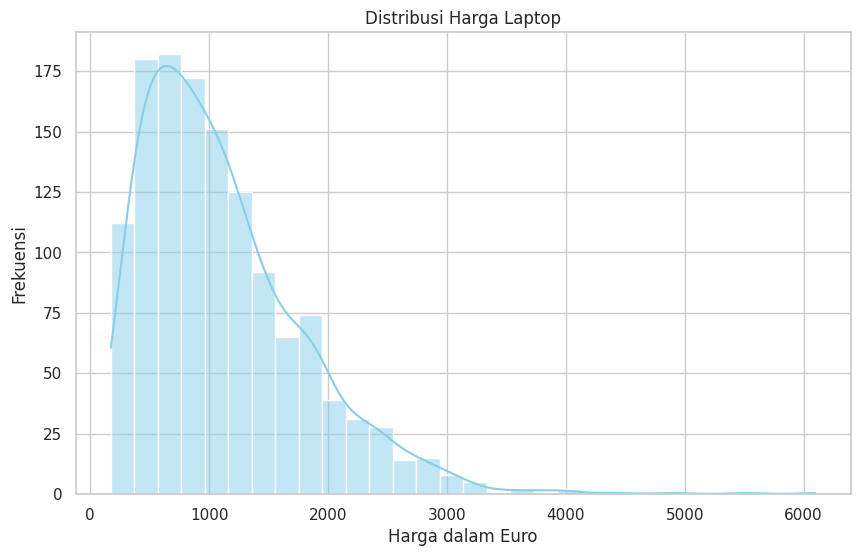

In [4]:


# Atur gaya untuk plot
sns.set(style="whitegrid")

# Distribusi Harga Laptop
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Price_euros'], kde=True, bins=30, color='skyblue')
plt.title('Distribusi Harga Laptop')
plt.xlabel('Harga dalam Euro')
plt.ylabel('Frekuensi')
plt.show()


<ipython-input-5-57acbe0971b7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Company', y='Price_euros', data=data_cleaned, palette="Set2")


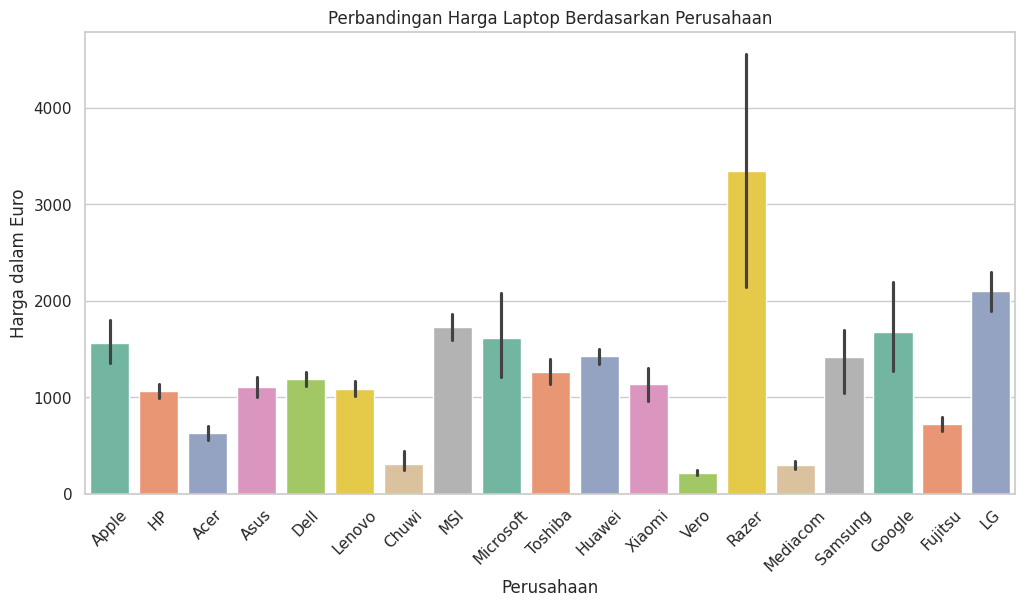

In [5]:
# Grafik Batang - Perbandingan Harga Berdasarkan Perusahaan
plt.figure(figsize=(12, 6))
sns.barplot(x='Company', y='Price_euros', data=data_cleaned, palette="Set2")
plt.title('Perbandingan Harga Laptop Berdasarkan Perusahaan')
plt.xlabel('Perusahaan')
plt.ylabel('Harga dalam Euro')
plt.xticks(rotation=45)
plt.show()

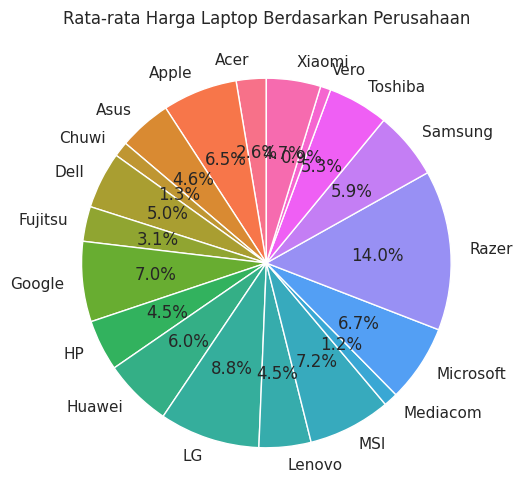

In [12]:
# Menghitung rata-rata harga per perusahaan
average_price_by_company = data_cleaned.groupby('Company')['Price_euros'].mean()

# Diagram Pie untuk Rata-rata Harga Laptop Berdasarkan Perusahaan
plt.figure(figsize=(10, 6))
average_price_by_company.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("husl", len(average_price_by_company)), legend=False)
plt.title('Rata-rata Harga Laptop Berdasarkan Perusahaan')
plt.ylabel('')
plt.show()


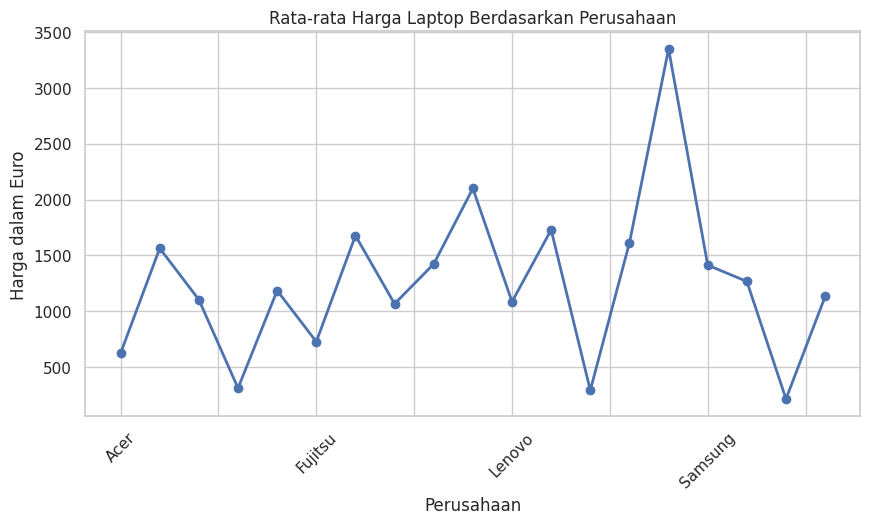

In [13]:
# Grafik Garis Rata-rata Harga Laptop Berdasarkan Perusahaan
plt.figure(figsize=(10, 5))
company_price_avg = data_cleaned.groupby('Company')['Price_euros'].mean()
company_price_avg.plot(kind='line', marker='o', color='b', linewidth=2)
plt.title('Rata-rata Harga Laptop Berdasarkan Perusahaan')
plt.xlabel('Perusahaan')
plt.ylabel('Harga dalam Euro')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<ipython-input-9-897251500193>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Inches', y='Price_euros', size='Ram', sizes=(20, 200), data=data_cleaned, palette="Blues")


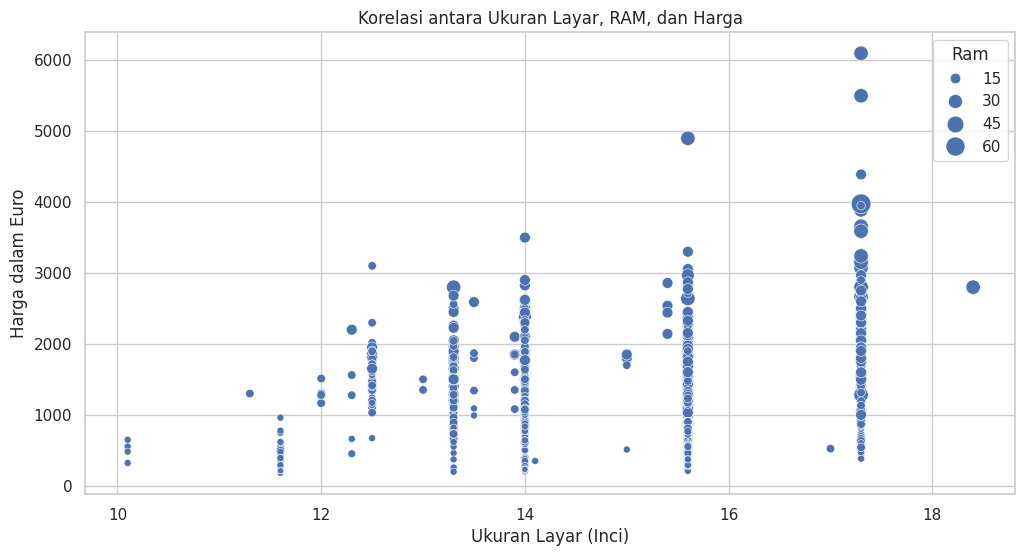

In [9]:
# Korelasi antara Ukuran Layar (Inci), RAM, dan Harga
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Inches', y='Price_euros', size='Ram', sizes=(20, 200), data=data_cleaned, palette="Blues")
plt.title('Korelasi antara Ukuran Layar, RAM, dan Harga')
plt.xlabel('Ukuran Layar (Inci)')
plt.ylabel('Harga dalam Euro')
plt.show()

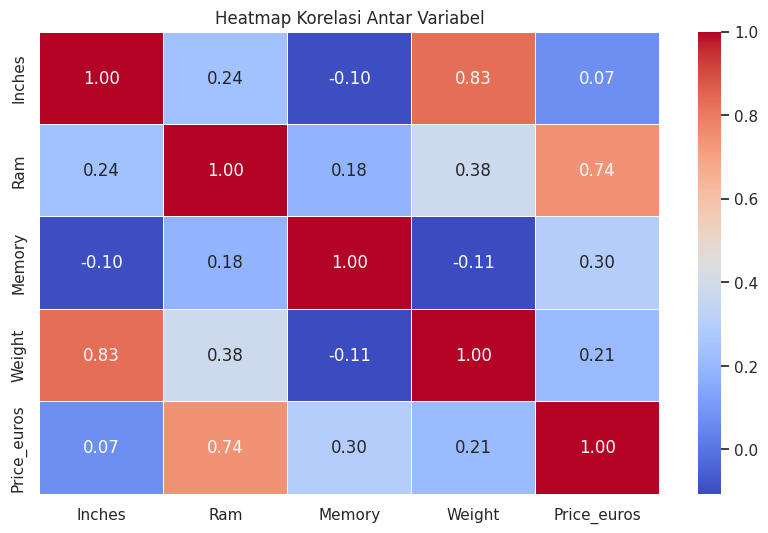

In [10]:
# Plot: Heatmap untuk Korelasi Antar Variabel
# Menghitung korelasi antar variabel numerik
correlation_matrix = data_cleaned[['Inches', 'Ram', 'Memory', 'Weight', 'Price_euros']].corr()

# Plot Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

<ipython-input-11-7b828480a78f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Company', y='Price_euros', data=data_cleaned, palette="Set2")


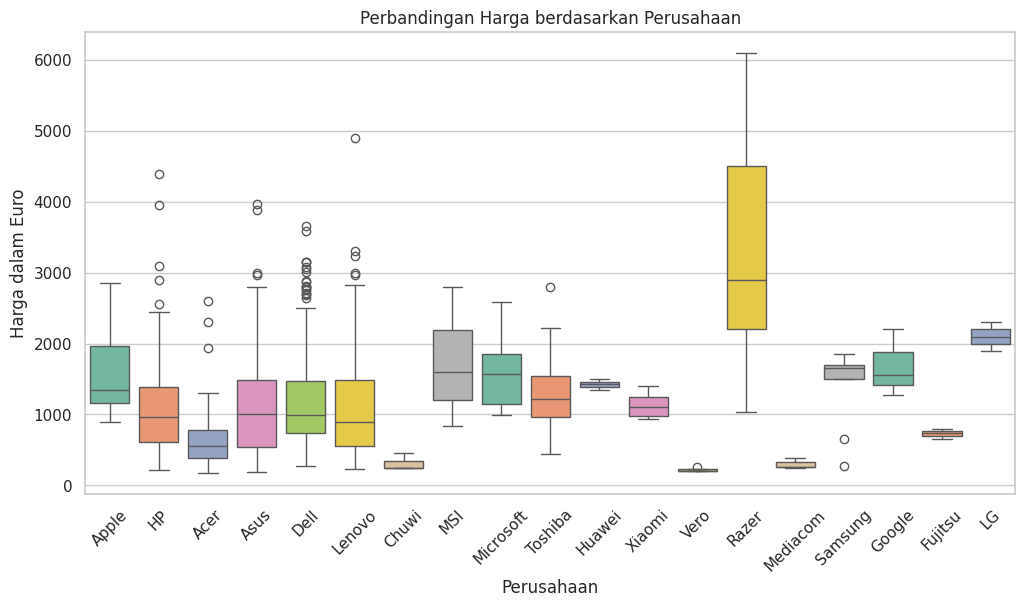

In [11]:
# Perbandingan Harga berdasarkan Perusahaan
plt.figure(figsize=(12, 6))
sns.boxplot(x='Company', y='Price_euros', data=data_cleaned, palette="Set2")
plt.title('Perbandingan Harga berdasarkan Perusahaan')
plt.xlabel('Perusahaan')
plt.ylabel('Harga dalam Euro')
plt.xticks(rotation=45)
plt.show()